### APS1070 Project 1 --- Basic Principles and Models
**Deadline: Oct 4th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Xinyang Yan  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1006777016

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Check that the completed `.ipynb` file runs correctly when using `Runtime -> Run All`.

2. Download your notebook: `File -> Download .ipynb`

3. Click on the Files icon on the far left menu of Colab

4. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


5. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

6. An HTML version of your notebook will appear in the files, so you can download it.

7. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [California housing dataset](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people). The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).


Download the dataset using the cells below:

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_california_housing()


## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**

* How many features do we have in this dataset? ___
* Determine the median target value. ___
* How many blocks have a target value greater than the median target value? ___


Now add an additional column containing either 0 (if the target value is below the median or equal to the median) or 1 (if the target value is greater than the median). This will be the new target value to classify the data as blocks with a median house value below median or above median. **[0.5]**

In [2]:
### YOUR CODE HERE ###
import pandas

df = pandas.DataFrame(fetch_california_housing()["data"], columns = fetch_california_housing()["feature_names"])
print(f"We have {df.shape[1]} features in the dataset.")


df["Target"] = fetch_california_housing()["target"]
print("The median value of TARGET is ", df["Target"].median())

df["Class"] = (df["Target"]  > df["Target"].median()).astype(int)
print("There are", df[df["Target"]  > df["Target"].median()].shape[0], "rows(INDIVIDUALS) that has a target value greater than the median target value. ")

print(df.head())

We have 8 features in the dataset.
The median value of TARGET is  1.797
There are 10317 rows(INDIVIDUALS) that has a target value greater than the median target value. 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  Class  
0    -122.23   4.526      1  
1    -122.22   3.585      1  
2    -122.24   3.521      1  
3    -122.25   3.413      1  
4    -122.25   3.422      1  


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=1``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [3]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn import datasets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(df.drop("Target", axis = 1).drop("Class", axis = 1), df["Class"], test_size = 0.3, random_state = 1)


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is `Population`, and the y-axis is `Latitude`, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




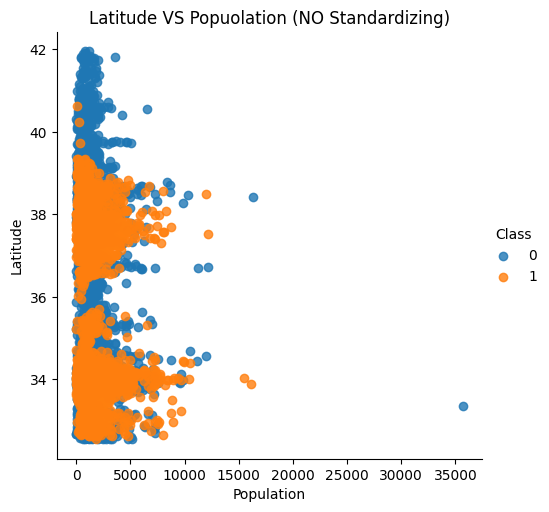

In [4]:
### YOUR CODE HERE ###
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

trainSet = pandas.concat([X_Train, Y_Train], axis = 1)
seaborn.lmplot(data = trainSet, x = "Population", y = "Latitude", hue = "Class", fit_reg=False)
plt.title("Latitude VS Popuolation (NO Standardizing)")
plt.show()

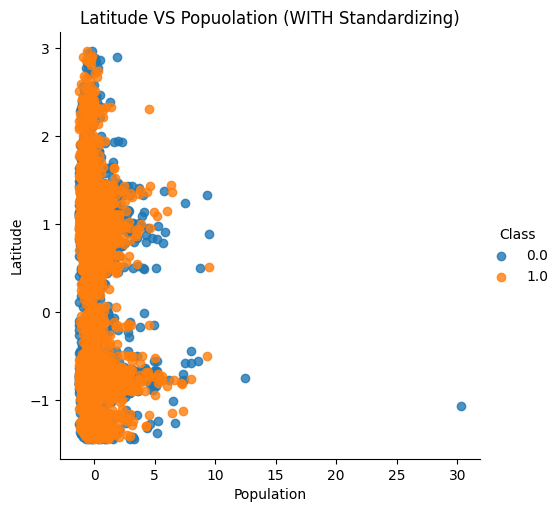

What's different?: The scale of the axes has changed. After Standardization both features are on the same scale, making it easier to visualize patterns, since the data is now centered around 0 with a standard deviation of 1.
Why do they look similar?:  Standardization is a linear transformation, so it retains the original shape of the data distribution, also the distances between points. Therefore, the overall appearance of the data distribution remains similar after standardization.
Advantage of Standardization?:
1. Many machine learning algorithms are sensitive to the scale of the features.
2. Standardization ensures that all features have a similar range of values, preventing features with larger values from dominating the model.
3. It can help algorithms converge faster during training and improve overall performance.


In [5]:
dataSet_2 = trainSet[["Population", "Latitude"]]
StandardizdDataSet_2 = StandardScaler().fit_transform(dataSet_2)
StandardizdDataSet_2 = pandas.DataFrame(StandardizdDataSet_2, columns = ["Population", "Latitude"])
StandardizdDataSet_2["Class"] = trainSet["Class"]
seaborn.lmplot(data = pandas.DataFrame(StandardizdDataSet_2, columns = ["Population", "Latitude", "Class"]), x = "Population", y = "Latitude", hue = "Class", fit_reg=False)
plt.title("Latitude VS Popuolation (WITH Standardizing)")
plt.show()

print("What's different?: The scale of the axes has changed. After Standardization both features are on the same scale, making it easier to visualize patterns, since the data is now centered around 0 with a standard deviation of 1.")
print("Why do they look similar?:  Standardization is a linear transformation, so it retains the original shape of the data distribution, also the distances between points. Therefore, the overall appearance of the data distribution remains similar after standardization.")
print("Advantage of Standardization?:")
print("1. Many machine learning algorithms are sensitive to the scale of the features.")
print("2. Standardization ensures that all features have a similar range of values, preventing features with larger values from dominating the model.")
print("3. It can help algorithms converge faster during training and improve overall performance.")

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether the blocks have a house value less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 1000 (feel free to use a step size larger than 1), and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



Our best k is  1
Our highest cross-validation accuracy is  0.6098409310581481


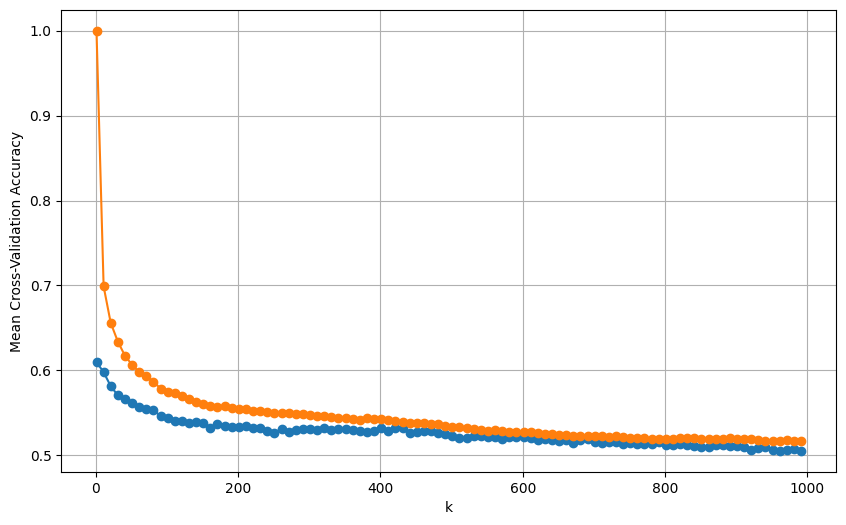

In [6]:
### YOUR CODE HERE ###
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import seaborn
import matplotlib.pyplot as plt

k_values = range(1, 1001, 10)
TEST_score_values = []
TRAIN_score_values = []
for k in k_values:
  KNN = KNeighborsClassifier(n_neighbors=k)
  result = cross_validate(KNN, X_Train, Y_Train, cv=5, return_train_score = True)
  TEST_score_values.append(result["test_score"].mean())
  TRAIN_score_values.append(result["train_score"].mean())
print("Our best k is ", TEST_score_values.index(max(TEST_score_values)) * 10 + 1)
print("Our highest cross-validation accuracy is ", max(TEST_score_values))
plt.figure(figsize = (10, 6))
plt.plot(k_values, TEST_score_values, marker = "o")
plt.plot(k_values, TRAIN_score_values, marker = "o")
plt.xlabel("k")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()


k=1 gives the highest validation accuracy.In my graph below. It demonstated that the train curve is above the test curve for ALL k. Overfitting happened at a small value of k, well fits the training data with high accuracy. Underfitting occurs at a large value of k, since both training and validation accuracies are low, the model is too simplistic.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


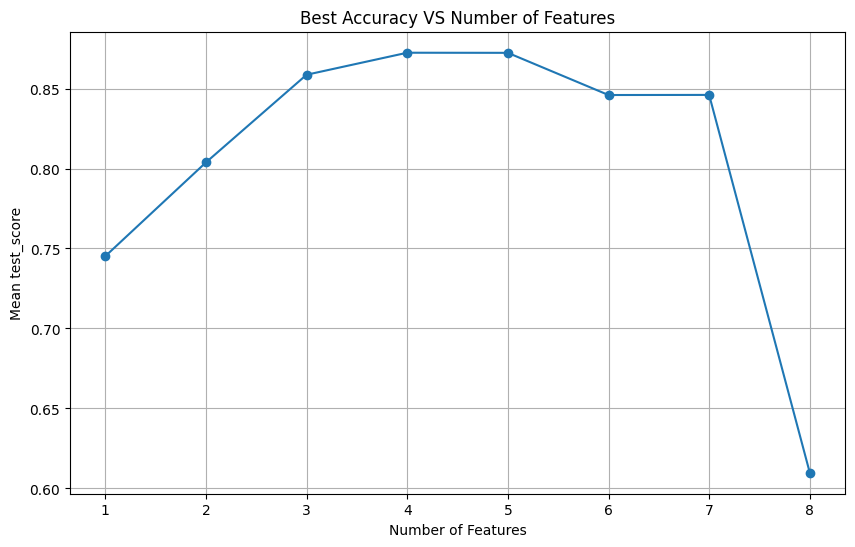

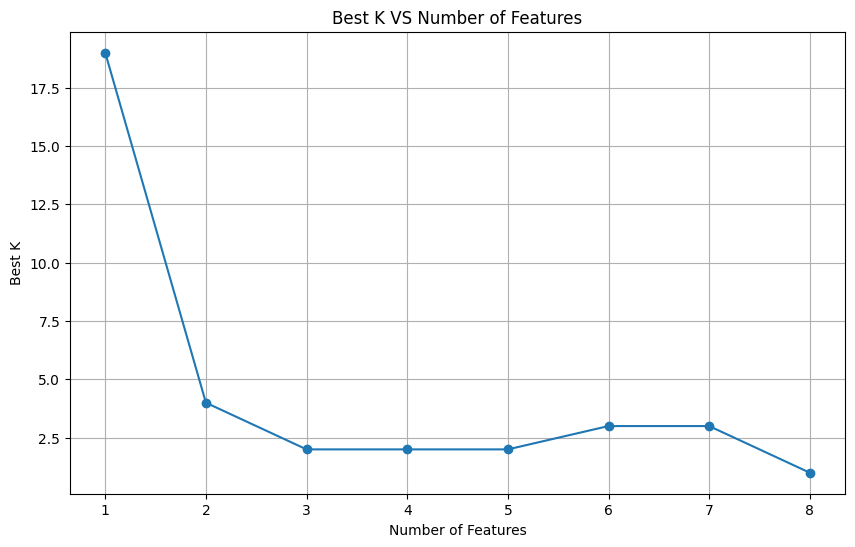

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn
def Featrue_selector(X_Train, Y_Train, threshold):
  decisionTree = DecisionTreeClassifier(random_state = 0)
  decisionTree.fit(X_Train, Y_Train)
  importances = decisionTree.feature_importances_
  sorted_indices = np.argsort(importances)
  step = 10
  k_values = range(1, 300, step)
  test_score_values = []
  best_K_List = []
  best_MeanCrossValidation_Score_List = []
  removedFeatures = []
  for k in k_values:
      KNN = neighbors.KNeighborsClassifier(n_neighbors = k)
      test_score_values.append(cross_validate(KNN, X_Train, Y_Train, cv = 5)["test_score"].mean())
  FULL_FEATURE_CROSS_VALIDATION_ACCURACY = max(test_score_values)
  FULL_FEATURE_CROSS_VALIDATION_BEST_K = test_score_values.index(max(test_score_values)) * step + 1
  best_K_List.append(FULL_FEATURE_CROSS_VALIDATION_BEST_K)
  best_MeanCrossValidation_Score_List.append(FULL_FEATURE_CROSS_VALIDATION_ACCURACY)
  test_score_values = []
  COLUMNS = X_Train.columns.copy()
  for i in range(0, len(sorted_indices)):
      least_important_index = sorted_indices[i]
      least_important_feature = COLUMNS[least_important_index]
      X_reduced = X_Train.drop(columns=[least_important_feature])
      if X_reduced.shape[1] == 0:
          break
      for k in k_values:
          KNN = neighbors.KNeighborsClassifier(n_neighbors = k)
          test_score_values.append(cross_validate(KNN, X_reduced, Y_Train, cv = 5)["test_score"].mean())
      bestK = test_score_values.index(max(test_score_values)) + 1
      bestMeanCrossValidationScore = max(test_score_values)
      if bestMeanCrossValidationScore < threshold * FULL_FEATURE_CROSS_VALIDATION_ACCURACY:
          break
      removedFeatures.append(COLUMNS[sorted_indices[-i]])
      best_K_List.append(bestK)
      best_MeanCrossValidation_Score_List.append(bestMeanCrossValidationScore)
      test_score_values = []
      X_Train = X_reduced
  return removedFeatures, best_MeanCrossValidation_Score_List, best_K_List

result = Featrue_selector(X_Train, Y_Train, 0.95)
removedFeatures = result[0]
removedFeatures += ["NONE"]
best_MeanCrossValidation_Score_List = result[1]
best_K_List = result[2]
best_MeanCrossValidation_Score_List.reverse()
best_K_List.reverse()
plt.figure(figsize = (10, 6))
plt.plot(range(X_Train.shape[1] - len(removedFeatures) + 1, X_Train.shape[1] + 1), best_MeanCrossValidation_Score_List, marker = "o")
plt.xlabel("Number of Features")
plt.ylabel("Mean test_score")
plt.grid(True)

plt.title("Best Accuracy VS Number of Features")
plt.show()

plt.figure(figsize = (10, 6))
plt.plot(range(X_Train.shape[1] - len(removedFeatures) + 1, X_Train.shape[1] + 1), best_K_List, marker = "o")
plt.xlabel("Number of Features")
plt.ylabel("Best K")
plt.grid(True)

plt.title("Best K VS Number of Features")
plt.show()



In [8]:
print("4 is the number of essential features for classification. Since we removed all the small features, but it doesn't mean that these are not important. \nWithout standardization, only the magnitude of the data's values affects the KNN, not importance.")

4 is the number of essential features for classification. Since we removed all the small features, but it doesn't mean that these are not important. 
Without standardization, only the magnitude of the data's values affects the KNN, not importance.


## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


We have removed the following features ->  ['Population', 'MedInc', 'Longitude', 'Latitude', 'AveOccup', 'AveRooms', 'NONE']


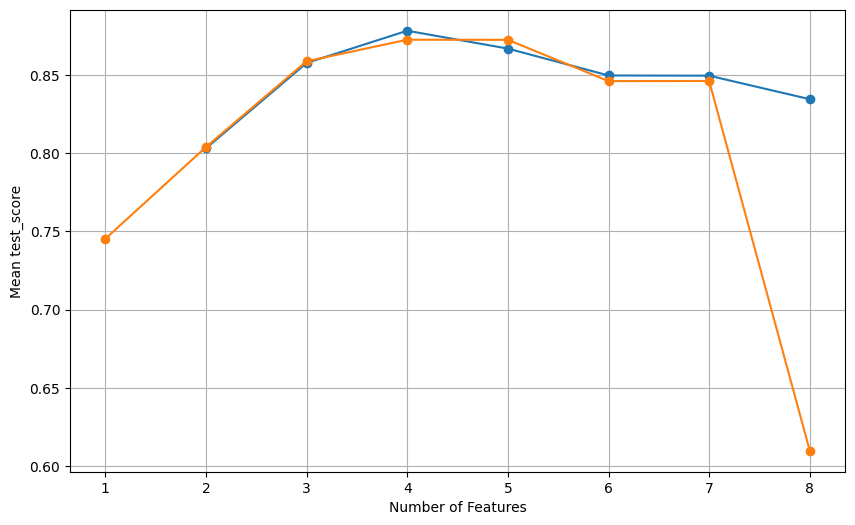

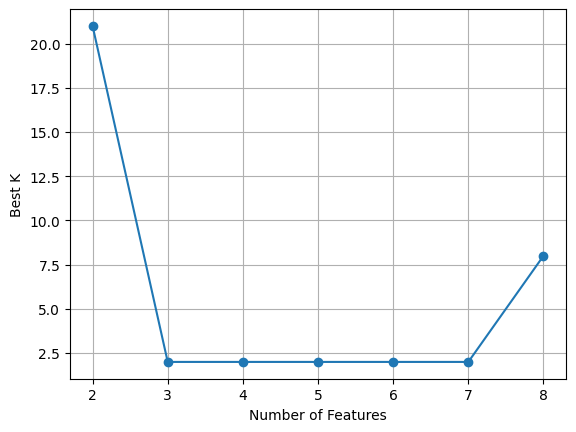

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn
scaler = StandardScaler()
scaler.fit(X_Train)
X_Train_Standardized = scaler.transform(X_Train)
X_Test_Standardized = scaler.transform(X_Test)

X_Train_Standardized = pandas.DataFrame(X_Train_Standardized, columns = X_Train.columns)
X_Test_Standardized = pandas.DataFrame(X_Test_Standardized, columns = X_Test.columns)

result_with_Standardization = Featrue_selector(X_Train_Standardized, Y_Train, 0.95)
removedFeatures_s = result_with_Standardization[0]
removedFeatures_s += ["NONE"]
print("We have removed the following features -> ", removedFeatures_s)
best_MeanCrossValidation_Score_List = result_with_Standardization[1]
best_MeanCrossValidation_Score_List.reverse()
best_K_List_2 = result_with_Standardization[2]
plt.figure(figsize = (10, 6))
plt.plot(range(X_Train_Standardized.shape[1] - len(removedFeatures_s) + 1, X_Train_Standardized.shape[1] + 1), best_MeanCrossValidation_Score_List, marker = "o")

result = Featrue_selector(X_Train, Y_Train, 0.95)
removedFeatures = result[0]
removedFeatures += ["NONE"]
best_MeanCrossValidation_Score_List = result[1]
best_MeanCrossValidation_Score_List.reverse()
plt.plot(range(X_Train.shape[1] - len(removedFeatures) + 1, X_Train.shape[1] + 1), best_MeanCrossValidation_Score_List, marker = "o")
plt.xlabel("Number of Features")
plt.ylabel("Mean test_score")
plt.grid(True)
plt.show()

plt.plot(range(X_Train.shape[1] - len(removedFeatures_s) + 1, X_Train.shape[1] + 1), best_K_List_2, marker = "o")
plt.xlabel("Number of Features")
plt.ylabel("Best K")
plt.grid(True)
plt.show()

In our oringinal dataset, we have features that have relatively large values (Population) and we alswo have features that have relatively small values (Average Badrooms). Before standardization, features with small values barely contribute to the distance calculation in KNN making them NON-SIGINIFICANT. After standardization, all features values have a mean of a zero and standard deviation of 1, making then EQUALLY-IMPORTANT in VALUES. Therefore, standardization helped our model to predict more meaningfully. After observation, I discovered that the following features are relatively
not important [Population', 'MedInc', 'Longitude', 'Latitude'] and after removing them (4 features left), our model has the highest accuracy 0.88 with K = 2.

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [10]:
### YOUR CODE HERE ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


list_0 = []
index_list_0 = []
i_step = 2
j_step = 2
for i in range(1, 100, i_step):
  for j in range(2, 100, j_step):
    decisionTree = DecisionTreeClassifier(max_depth = i, min_samples_split = j)
    list_0.append(cross_validate(decisionTree, X_Train_Standardized, Y_Train, cv = 5)["test_score"].mean())
    index_list_0.append((i, j))
best_tree_accuracy = max(list_0)
best_tree_index = list_0.index(max(list_0))
best_i, best_j = index_list_0[best_tree_index]
print("The best tree accuracy is ", best_tree_accuracy, ".\n")
print("The best max_depth and min_samples_split is ", best_i, "and ", best_j, ".\n")
step = 10
k_values = range(1, 300, step)
list_1 = []
for k in k_values:
  KNN = neighbors.KNeighborsClassifier(n_neighbors = k)
  list_1.append(cross_validate(KNN, X_Train_Standardized, Y_Train, cv = 5)["test_score"].mean())
best_KNN_accuracy = max(list_1)
best_KAN_Index = list_1.index(max(list_1)) * step + 1
print("The best KNN accuracy is ", best_KNN_accuracy, ".\n")
print("In most cases, the tree model has a higher accuracy.\n")






The best tree accuracy is  0.8504295376448789 .

The best max_depth and min_samples_split is  11 and  40 .

The best KNN accuracy is  0.8343719226130375 .

In most cases, the tree model has a higher accuracy.



## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [11]:
decisionTree = DecisionTreeClassifier(max_depth = best_i, min_samples_split = best_j)
print("The mean accuracy number is ", cross_validate(decisionTree, X_Test_Standardized, Y_Test, cv = 5)["test_score"].mean())


The mean accuracy number is  0.8310691435195146


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/